# Week 11: Networks 3 (epidemiology)


While researchers have been modeling the spread of diseases and information for many years, the COVID-19 pandemic playing out right now puts a new emphasis on the importance of being able to model (and thus predict) how diseases propagate through populations. So how do you most effectively model the spread of a disease? There are many^ ways, and all of them (at least the useful ones) involves networks. In this notebook you will get your hands on a couple different modeling approaches. Specifically:

* Spreading processes on static networks
* Spreading processes on temporal networks
* Metapopulation models

**Questions**: Outside of class, use [issue on GitHub](https://github.com/abjer/tsds/issues) for asking questions.

## Imports

In [420]:
%matplotlib inline
import matplotlib.pylab as plt
import networkx as nx
import netwulf as nw

## Exercises

In a *contact network* nodes are people and links represent interactions that can happen between people. You can use such a network as a *substrate* for simulating the spreading of "something". Spreading of what? That's up to you. It can be a disease, a behavior, a piece of information, anything you can imagine people may pass along. There's a whole subfield of Network Science which deals with this, but the fundamental idea is actually quite simple:

> Nodes that are connected can transmit this "something" with a probability. Each timestep of the simulation is an opportunity for the "something" to spread.

You can then make this more nuanced by adding extra criteria for transmission. For disease modeling these can e.g. be that nodes can only be infected after multiple exposures or if multiple neighbors are infected, that they can be cured and become resistant/susceptible with some probability, that they may die and exit the simulation creating a void in the network, that becoming infected makes them change their links, that godzilla walks in and eats everyone—the possibilities are endless and you decide which rules exist in the simulation universe.

Generally speaking, there are four major classes of so-called "compartmental models" in network epidemiology:
* *Susceptible-Infected (SI)*: Nodes are susceptible at start, and once they are infected they never recover. This models spreading of unforgetable information, or diseases that people get and pass on, and never recover from (like HIV, herpes, etc.).
* *Susceptible-Infected-Susceptible (SIS)*: Nodes are susceptible, then get infected and stay infected for some time, then get susceptible again, an the cycle continues. This could model things like the flu which comes and goes and you get and recover from over and over again.
* *Susceptible-Infected-Resistant (SIR)*: Nodes become infected and after some time they gain resistance so that they can niether become infected nor spread disease/information further. Once they are resistant they are essentially "removed" from the network, so this type of model works for diseases where people recover and gain resistance as well as ones that kill people, as niether type of person can transmit (measles, chickenpox but also rabies, Creutzfeldt–Jakob disease, etc.).
* *Susceptible-Infected-Resistant-Susceptible (SIRS)*: Probably self-explanatory if you understood the above.

The idea that drives the "compartmenal" modeling approach is that within a population you can assign each
individual to a compartment based on their "state" (infected, susceptible, etc.). When you start the simulation,
individuals then flow between compartments with specific flow rates.

![img](https://upload.wikimedia.org/wikipedia/commons/9/93/SIR_Flow_Diagram.svg)

This then allows us to describe the flow of individuals between compartments (and thus the spreading of the disease)
using differential equations. For example in the simple SIR model shown above, the dynamics can be described with
three differential equations (one for each compartment). They each tell us how fast the population in the corresponding
compartment it changing:

$$\frac{dS}{dt} = -\beta SI$$

$$\frac{dI}{dt} = \beta SI - \gamma I$$

$$\frac{dR}{dt} = \gamma I$$

So at a given point in time how many people are leaving the susceptible compartment and entering the Infected compartment?
Well that's simply the the number of susceptible $S$ times the number of infected $I$ multipled with some disease-specific constant $\beta$.

And what's the growth in the number of infected? Easy! It's just the number of people coming in from the susceptible compartment $\beta SI$ minus all the people leaving for the "Recovered" compartment $\gamma I$, where gamma is some constant that describs how fast people recover.

And the rate at which people enter the recovered state? If you understood the above you can explain this to yourself.

**That's it!**. That's how all compartmental models work!

> **Ex. 11.1.1**: But as I wrote above there are many different types of compartmental models. Write down the rate equations for the SIS model:
>
>![img](https://upload.wikimedia.org/wikipedia/commons/c/cb/SIS_compartment_model.svg)
>
> Follow the reasoning in the example for the SIR model above. Answer the following:
* how many equations you need if there are two compartments.
* What specifically does each equation describe?
* What do $\beta$ and $\gamma$ intuitively describe? What can you say about a disease with a really big $\gamma$? Or a really small $\gamma$? How about big or small $\beta$?

### Answer

Two equations are needed - one for each state:

$$\frac{dI}{dt} = \beta SI - \gamma I$$

As in the SIR model at each point in time the growth in the number of infected will be given by the newly infected minus those who "recover" and rejoins the susceptible group.

$$\frac{dS}{dt} = -\frac{{dI}}{{dt}} $$

Since we only have to possible states in this model, it is clear that the growth rate of the group of susceptible individuals must be the opposite of those moving out of this group, i.e. minus the growth rate of the infected group, cf. the above equation.

$\beta$ is a disease specific parameter specifying the infection rate if an individual comes in to contact with an infected individual.

$\gamma$ is also a disease specific parameter, which specifies the recovery rate. 
A sufficiently low recovery rate ($\gamma< \beta $) means that at any point in time, there will be a number of infected people and we will have an "endemic state".

If, on the other hand, we have a high recovery rate ($\gamma > \beta $) then there is a potential of a "disease-free state", where the disease dies out over time.



> **Ex. 11.1.2** (optional): If you really understood the above, you should have no trouble writing down the equations for a SIRS
model. Go ahead and try. Hint: You will need to introduce a new constant that describes the rate at which people move from R to S.

### Answer

We have three different states and will thus need three equations.
As suggested, I introduce a constant, $\mu$, indicating the rate at which people move from R to S.

People can either move out of the susceptible group, $-\beta SI $, or move back in to it from the recovery group, $\mu S $. Hence the growth rate of the susceptible group is: 

$$\frac{dS}{dt} = -\beta SI + \mu R $$

The growth in the number of infected is the same as before, since people can only move in to the group from the susceptible group or in to the recovered group at rate $\gamma$:

$$\frac{dI}{dt} = \beta SI - \gamma I $$

Lastly, any changes in the recovery group will come from people moving out of the infected group, $\gamma I$, or from people moving back to the suscpetible group, $\mu R $. Thus, the growth rate of the recovery group is:  

$$\frac{dR}{dt} = \gamma I - \mu R $$

> **Ex. 11.1.3**: Professor of physics and mathematic and all around cool guy, Dirk Brockmann,
makes interactive articles called *Explorables* that introduce ideas in Complexity science. Read/play with
[his explorable](http://www.complexity-explorables.org/explorables/neighbors/) on targeted vaccination to mitigate epidemic spreading in the real world and answer the
following questions:
> 1. In the BA network, roughly what percentage of the population do you have to vaccinate with **strategy A** to only get around 10
infected individuals? What about **startegy B** and **strategy C**?
> 2. **strategy A** and **strategy C** are both entirely random, but one is much more effective than the other. Explain
why. What clever idea is **strategy C** employing?
> 3. Why is this effect larger in the BA network than in the ER network?

### Answer

1) 
A: $\approx 75 \%$
B: $\approx 20 \%$
C: $\approx 55 \%$

2)
This is due to the fact that strategy C takes advantage of the friendship paradox: Your friends (conneections) are more likely to have more friends (connections) than you. The paradox can be interpreted as be due a sample bias. The intuition is that when we pick someone who is your friend, we are not picking just a random node in the network but someone who has you as friend and thus is likely to have a higher degree (connectivity) on average than any other random node in the network.

Using this property we can get a lower number of infected by relying on a random strategy that does not require that we know which nodes are the most connected, as the otherwise superior strategy B requires.

3)
Beacuse the BA network has a stronger variation in node degree, which tends to amplify the effects of the different strategies.


> **Ex. 11.1.4**: Choose one of these two explorables ([1](http://www.complexity-explorables.org/explorables/herd/) or [2](http://www.complexity-explorables.org/explorables/epidemonic/)) read/play with and understand it, and explain in your own words what phenomenon it communicates.

### Answer - explorable "Epidemonic"

This explorable models the SIRS model of 11.1.2 and allows for exploration of the effects of changing the parameters, $\gamma, \mu$ and $\beta $, i.e. the parameters specifying the movement between the three potential states an individual can have in the model.

In addition, it allows for investigating the spread with more than one population, which introduces an additional parameter, the migration rate, that one can also play around with to get a feel of its effect on the spread of the disease.

These parameters and their relative sizex all affect the spread of the disease, as witnessed in the growth rates in 11.1.2. 
However, overall the spread of the disease is lower, the lower $\beta$ and $\mu$, i.e. the infection and waning immunity rate, respectively, and the higher the recovery rate, $\gamma$. 

> **Ex. 11.1.5**: The simplest compartmental model is the *SI* model. Below I have implemented a simulation of such a model.
You can see in line 5 that I initialize all nodes in the *S* compartment, but after running, all nodes are in the *I* compartment.
Does this make sense to you?
1. Comment the code abundantly, explaining what's happing at each step.
2. Adapt the code and make a plot of the fraction of infected over time. You may have to restart it a couple of time to make sure patient 0 is someone connected to the rest of the population.
3. Extend the code such after a variable number of timesteps `T_I` infected nodes become susceptible again. Set `T_I = 10` to begin with and plot the fraction of infected over time for 200 timesteps. Does the result make sense? Comment on what you see.

In [421]:
G = nx.connected_caveman_graph(10, 5) # We create a network as a caveman network, in which we connect 10 cliques of size 5
# _ = nw.visualize(G) # Uncomment if you want to have a look at the network

In [422]:
import numpy as np

# 1)
p_I = 0.1 # set probability of infection = 0.1
n_iter = 200 # set number of iterations = length of considered time period

I = set() # Create empty set of infected - no one is sick
S = set(G.nodes()) # Create set of suscpetible = number of nodes in the network - everyone is Suscpetible

patient0 = np.random.choice(list(S)) # Choose a random patient0 in the network

I.add(patient0) # Add this person to the set of infected
S.remove(patient0) #... and remove the person from the group of susceptible

for t in range(n_iter):  # We loop over the duration of all periods 
    for infected_node in list(I): # In each iteration/time period we consider all infected individuals
        neighbors = G.neighbors(infected_node) # ...and identify their neighbors
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) 
#...we then determine if a neighbor is infected by evaluating their random chance of infection against the probability of infection
# If the neighbor is infected it is added to the set of infected neighbors
        I |= infected_neighbors # I is then set equal to infected neighbors
        S -= infected_neighbors # and S is set equal to those who are not infected

C:\Users\mfr.eco\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:57: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


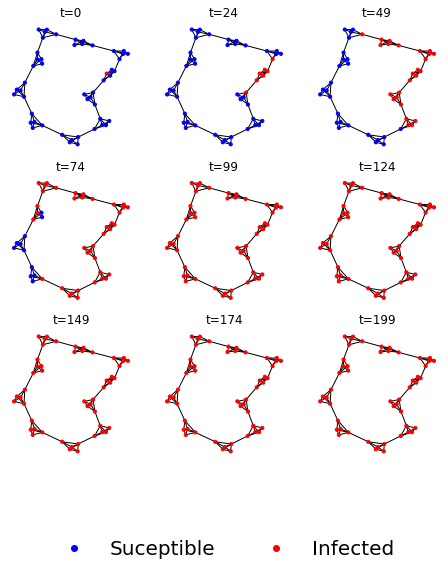

In [428]:
# 2) 
from matplotlib import gridspec
from matplotlib.lines import Line2D

p_I = 0.1 # set probability of infection = 0.1
n_iter = 200 # set number of iterations = length of considered time period

I = set() # Create empty set of infected - no one is sick
S = set(G.nodes()) # Create set of suscpetible = number of nodes in the network - everyone is Suscpetible
N = len(G.nodes())

patient0 = np.random.choice(list(S)) # Choose a random patient0 in the network

I.add(patient0) # Add this person to the set of infected
S.remove(patient0) #... and remove the person from the group of susceptible

F_inf=[len(I)/len(list(G))] #Create share infected and prepoluate with share with patient zero

# I borrow your code for setting up a function to draw the networks
def gdraw(G, S, ax):
    nx.draw(G,
    ax = ax,
    pos = nx.spring_layout(G, seed = 10),
    node_color = ['blue' if n in S else 'red' for n in range(N)],
    node_size = 10)

# Draw initial fraction of infected
fig = plt.figure(figsize = (16,8))
gs = gridspec.GridSpec(3, 6)
x = 0
y = 0
ax = plt.subplot(gs[x,y])

gdraw(G, S, ax)
ax.set_title('t=0')

for t in range(n_iter): 
    for infected_node in list(I): 
        neighbors = G.neighbors(infected_node) 
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) 
        I |= infected_neighbors
        S -= infected_neighbors 
    F_inf.append(len(I)/len(list(G))) # Get list of infected over time
    
    #Plot share of infected over time 
    if ((t+1)/(n_iter/8)).is_integer():
        y += 1
        if y > 2:
            y = 0
            x += 1
        ax = plt.subplot(gs[x,y])
        gdraw(G,S, ax)
        ax.set_title(f't={t}')

#To add legends I again borrow your code
custom_entries = [Line2D([0], [0], marker = 'o', color='blue', label='Suceptible', lw=0), Line2D([0], [0], marker = 'o', color='red', label='Infected', lw=0)]
ax = plt.subplot(gs[2,1])
ax.legend(handles=custom_entries,
fontsize = 20,
frameon = False,
loc='upper center',
bbox_to_anchor=(0.5, -0.5),
ncol=2)

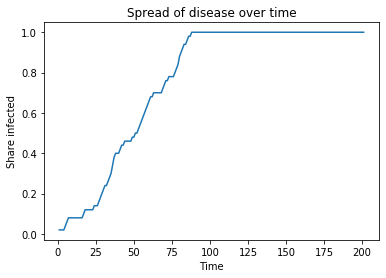

In [429]:
#2) Plot development in share of infected over time

plt.plot(range(1, n_iter+2), F_inf, label='Share of infected over time')
plt.ylabel('Share infected')
plt.xlabel('Time')
plt.title('Spread of disease over time')
plt.show()

C:\Users\mfr.eco\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\mfr.eco\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:76: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


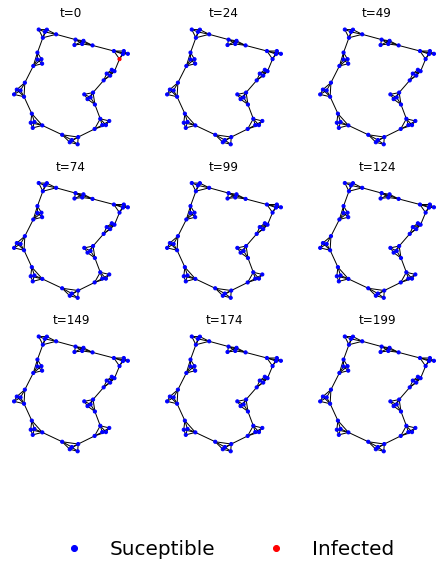

In [436]:
#3) Extend the code such after a variable number of timesteps T_I infected nodes become susceptible again. 
#Set T_I = 10 to begin with and plot the fraction of infected over time for 200 timesteps. 
#Does the result make sense? Comment on what you see.
# For this question I again borrow some of your code to create a ringbuffer

class RingBuffer:
    def __init__(self, length):
        self.length = length
        self.data = [None]*length
    def add(self, value):
        if len(self.data) < self.length:
            self.data.insert(0,value)
        else:
            self.data = self.data[:-1]
            self.data.insert(0,value)
    def take(self):
        return self.data.pop()
    
T_I = 10
rb = RingBuffer(T_I)

I = set() 
S = set(G.nodes()) 

p_I = 0.1

patient0 = np.random.choice(list(S)) 

I.add(patient0) 
S.remove(patient0) 

F_inf=[len(I)/len(list(G))] 

# I borrow your code for setting up a function to draw the networks
def gdraw(G, S, ax):
    nx.draw(G,
    ax = ax,
    pos = nx.spring_layout(G, seed = 10),
    node_color = ['blue' if n in S else 'red' for n in range(N)],
    node_size = 10)

# Draw initial fraction of infected
fig = plt.figure(figsize = (16,8))
gs = gridspec.GridSpec(3, 6)
x = 0
y = 0
ax = plt.subplot(gs[x,y])

gdraw(G, S, ax)
ax.set_title('t=0')

for t in range(n_iter): 
    for infected_node in list(I): 
        neighbors = G.neighbors(infected_node) 
        infected_neighbors = set([n for n in neighbors if np.random.random() < p_I]) 
        rb.add(infected_neighbors)
        recoveries = rb.take()
        I |=infected_neighbors 
        if recoveries is not None:
            S |= recoveries
            I -= recoveries 
    F_inf.append(len(I)/len(list(G))) # Get list of infected over time
    
    #Plot share of infected over time 
    if ((t+1)/(n_iter/8)).is_integer():
        y += 1
        if y > 2:
            y = 0
            x += 1
        ax = plt.subplot(gs[x,y])
        gdraw(G,S, ax)
        ax.set_title(f't={t}')

#To add legends I again borrow your code
custom_entries = [Line2D([0], [0], marker = 'o', color='blue', label='Suceptible', lw=0), Line2D([0], [0], marker = 'o', color='red', label='Infected', lw=0)]
ax = plt.subplot(gs[2,1])
ax.legend(handles=custom_entries,
fontsize = 20,
frameon = False,
loc='upper center',
bbox_to_anchor=(0.5, -0.5),
ncol=2)



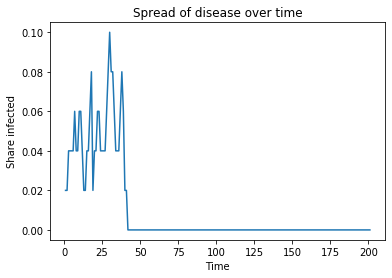

In [437]:
#2) Plot development in share of infected over time

plt.plot(range(1, n_iter+2), F_inf,label='Share of infected over time')
plt.ylabel('Share infected')
plt.xlabel('Time')
plt.title('Spread of disease over time')
plt.show()

> **Ex. 11.1.6**: Use what you have learned and implement an SIRS model.
* Run it on the Facebook network from last week (so load that into a `networkx.Graph`).
* Record the fraction of infected, susceptiple and recovered over time.
* After the simulation has run, plot these quantities over time and comment on your results
* Be proud of yourself for having solved a really interesting problem.

In [414]:
# Read data
import pandas as pd

data = pd.read_csv(
    "facebook-wall.txt",
    delimiter="\t",
    header=None,
    names=['user1', 'user2', 'timestamp']
)

# Choose considered time horizon
t0 = data.timestamp.max() - 86400 * 10  # Lower bound of time-slice (here: 10 days before last wall post)
t1 = data.timestamp.max()              # Upper bound of time-slice
data = data.loc[data.timestamp.between(t0, t1)]

# Graphing the dataframe with nx 
G = nx.from_pandas_edgelist(data, 'user1', 'user2')

In [415]:
# SIRS-model
#G = nx.connected_caveman_graph(3, 2)
n_iter = 200 # set number of iterations = length of considered time period

# set parameter values
p_I = 0.15 # set probability of infection 
mu = 0.1 # the rate at which people move from R to S
gamma = 0.1 # the rate of recovery

# Create possible states as lists
I = set() 
R =set() # In the beginning no one is recovered yet
S = set(G.nodes()) 
N = set(G.nodes())

patient0 = np.random.choice(list(S)) 
I.add(patient0) 
S.remove(patient0) 

F_inf=[len(I)/len(list(G))] #Create share infected and prepoluate with share with patient zero
F_suc=[len(S)/len(list(G))] #Create share susceptible and prepoluate with share with patient zero
F_rec=[len(R)/len(list(G))] #Create share recovered 

# Model spread of disease
for t in range(n_iter):  # We loop over the duration of all periods 
    infected_neighbors = set()
    for infected_node in list(I):         
        neighbors = G.neighbors(infected_node)
        infected_neighbors |= set([n for n in neighbors if np.random.random() < p_I])
        
    recovered = set([n for n in list(I) if np.random.random() < gamma]) # identify recovered individuals
    waning_immunity = set([n for n in list(R) if np.random.random() < mu]) #identify individuals losing immunity
    
    I |= set(infected_neighbors)
    I -=set(recovered)# I is then set equal to infections + change 

  
    S |= set(waning_immunity) # S is then set equal to susceptible + change 
    S -=set(infected_neighbors)
    
   
    R |= set(recovered)
    R-=set(waning_immunity)


    F_inf.append(len(I)/len(N)) # Get list of infected over time
    F_suc.append(len(S)/len(N)) # Get list of infected over time
    F_rec.append(len(R)/len(N)) # Get list of infected over time


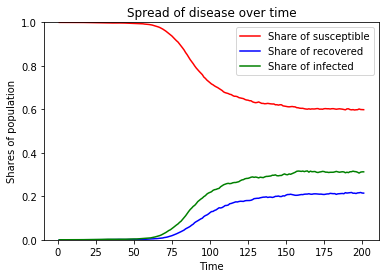

In [416]:
plt.plot(range(1, n_iter+2), F_suc, color='red', label='Share of susceptible')
plt.plot(range(1, n_iter+2), F_rec, color='blue', label='Share of recovered')
plt.plot(range(1, n_iter+2), F_inf, color='green', label='Share of infected')

plt.legend(loc='best')
plt.ylabel('Shares of population')
plt.xlabel('Time')
plt.ylim(0,1)
plt.title('Spread of disease over time')
plt.show()

### Further learning

Since the above exercises teaches you how to write down epidemic models (as systems of differential equations)
and subsequently teaches you how to simulate a spreading process on a network to obtain data on infected/susceptible/recovered
over time, you would think it natural that I also taught you how to fit these epidemic models to such data.
This, however, is going a bit too far as this is not a course in computational epidemiology. But if you want to
figure out how to do it, you literally just need to Google search for "fit SIR model".

And finally, a note on how these models are used in the real world. The state-of-the-art in epidemiological modeling is something called "meta popultion models". They are essentially systems of compartmental models. One component in such a model may be a country, and it has its own little SI, SIR or SIRS model. Components are then coupled because there are people moving between them. The paper *The Hidden Geometry of Complex,
Network-Driven Contagion Phenomena* by Dirk Brockmann and Dirk Helbing published in Science in 2013 ([link here](https://www.dropbox.com/s/hxprfyr51fwh907/brockmann13.pdf?dl=0)) sets up such a model for the world using airline traffic as a proxy for people flow between countries. It is a must read if you
are curious about how the pros predict things like when a disease will arrive in a certain place or where a disease originated. I strongly recommend reading it and understanding the figures, it is a stroke of genius.